In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline
plt.figure(figsize=(50,30))

<Figure size 3600x2160 with 0 Axes>

<Figure size 3600x2160 with 0 Axes>

In [3]:
data = pd.read_csv("Multiple_Linear_Regression_Advertising_data.csv")

In [4]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
data.shape


(200, 4)

In [6]:
x = data.iloc[: , :3]
print(x)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
5      8.7   48.9       75.0
6     57.5   32.8       23.5
7    120.2   19.6       11.6
8      8.6    2.1        1.0
9    199.8    2.6       21.2
10    66.1    5.8       24.2
11   214.7   24.0        4.0
12    23.8   35.1       65.9
13    97.5    7.6        7.2
14   204.1   32.9       46.0
15   195.4   47.7       52.9
16    67.8   36.6      114.0
17   281.4   39.6       55.8
18    69.2   20.5       18.3
19   147.3   23.9       19.1
20   218.4   27.7       53.4
21   237.4    5.1       23.5
22    13.2   15.9       49.6
23   228.3   16.9       26.2
24    62.3   12.6       18.3
25   262.9    3.5       19.5
26   142.9   29.3       12.6
27   240.1   16.7       22.9
28   248.8   27.1       22.9
29    70.6   16.0       40.8
..     ...    ...        ...
170   50.0   11.6       18.4
171  164.5   20.9       47.4
172   19.6   2

In [7]:
y = data.iloc[: , 3:]
print(y)

     Sales
0     22.1
1     10.4
2      9.3
3     18.5
4     12.9
5      7.2
6     11.8
7     13.2
8      4.8
9     10.6
10     8.6
11    17.4
12     9.2
13     9.7
14    19.0
15    22.4
16    12.5
17    24.4
18    11.3
19    14.6
20    18.0
21    12.5
22     5.6
23    15.5
24     9.7
25    12.0
26    15.0
27    15.9
28    18.9
29    10.5
..     ...
170    8.4
171   14.5
172    7.6
173   11.7
174   11.5
175   27.0
176   20.2
177   11.7
178   11.8
179   12.6
180   10.5
181   12.2
182    8.7
183   26.2
184   17.6
185   22.6
186   10.3
187   17.3
188   15.9
189    6.7
190   10.8
191    9.9
192    5.9
193   19.6
194   17.3
195    7.6
196    9.7
197   12.8
198   25.5
199   13.4

[200 rows x 1 columns]


In [8]:
data.isnull()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [9]:
data.dropna()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [10]:
data[data.notnull()]

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=9)

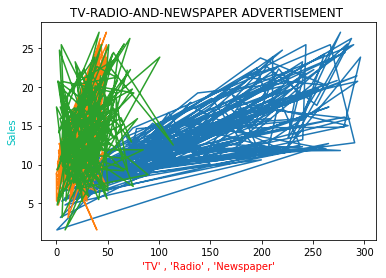

In [21]:
plt.plot(x,y)
plt.xlabel("'TV' , 'Radio' , 'Newspaper'",color='r')
plt.ylabel("Sales",color='c')
plt.title("TV-RADIO-AND-NEWSPAPER ADVERTISEMENT ")
plt.show()